# Neurona con multiples entradas - puerta logica AND

Intentemos replicar ahora el funcionamiento de una puerta lógica AND

In [1]:
import numpy as np

x1 = np.array([0.,  1.,  0.,  1.])
x2 = np.array([0.,  0.,  1.,  1.])
z = np.array([0.,  0.,  0.,  1.])

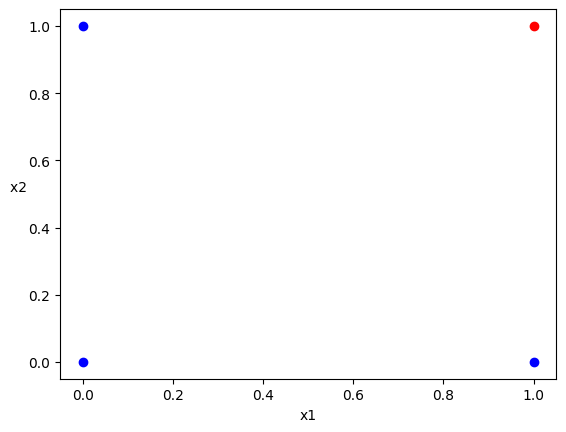

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x1[0:3], x2[0:3], c='blue')
plt.scatter(x1[3], x2[3], c='red')
plt.xlabel('x1')
plt.ylabel('x2  ', rotation=0)
plt.show()

Vamos a usar una neurona, igual que antes, pero en este caso con dos entradas

<div style="text-align:center;">
  <img src="Imagenes/red_neuronal_AND.png" alt="neurona_AND"> <!-- style="width:425px;height:425px;" -->
</div>

Como se puede ver, se han llamado a los parámetros de la neurona $\omega_i$. Así es como se suelen llamar generalmente a los parámetros de las redes neuronales.

Por otro lado, se suele llamar al parámetro al que no se le multiplica por la entrada $\omega_0$ y al resto de parámetros $\omega_i$

## Inicialización aleatoria de los parámetros

Inicializamos aleatoriamente los parámetros $\omega_0$, $\omega_1$ y $\omega_2$

In [3]:
import random

random.seed(45) # Esto es una semilla, cuando se generan números aleatorios, 
                # pero queremos que siempre se genere el mismo se suele fijar
                # un número llamado semilla. Esto hace que siempre a sea el mismo

w0 = random.random()
w1 = random.random()
w2 = random.random()

print(f'Los parámetros inicializados aleatoriamente son w0 = {w0:.4f}, w1 = {w1:.4f} y w2 = {w2:.4f}')

Los parámetros inicializados aleatoriamente son w0 = 0.2719, w1 = 0.4880 y w2 = 0.0819


Vamos a ver saldría con estos parámetros

In [4]:
z_p = w0 + w1*x1 + w2*x2

# Si el valor predicho es mayor que 0.5 se considera la salida un 1, si no un 0
z_bin = (z_p>0.5).astype(int)

print(f"z predicha: {z_p}, z predicha binaria: {z_bin}")
print(f"z: {z}")

z predicha: [0.27187541 0.75990362 0.35375476 0.84178296], z predicha binaria: [0 1 0 1]
z: [0. 0. 0. 1.]


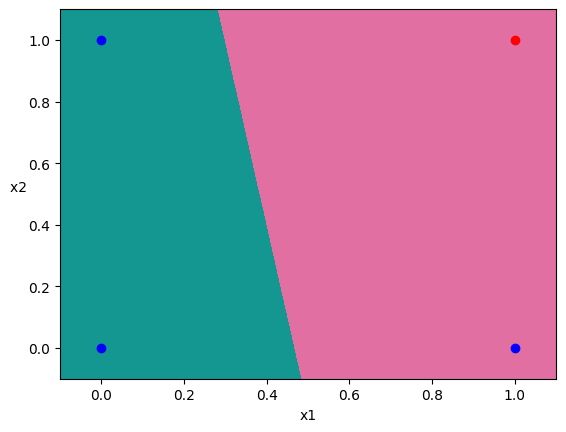

In [5]:
from matplotlib.colors import ListedColormap


# Se crean dos vectores con todos los posibles valores de entrada
max_axis = 1.1
min_axis = -0.1
axes = [min_axis, max_axis, min_axis, max_axis]
xx1, xx2 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 500).reshape(-1, 1),
)

# all_x1 y all_x2 son matrices de tamaño 500x500, se aplanan
X1_new = np.c_[xx1.ravel()]
X2_new = np.c_[xx2.ravel()]

# Se calculan las posibles salidas
all_z_predict = w0 + w1*X1_new + w2*X2_new

# Si el valor predicho es mayor que 0.5 se considera la salida un 1, si no un 0
all_z_predict = (all_z_predict>0.5).astype(int)

# z_predict es un array de 250000x1, se redimensiona en forma de matriz de 500x500
all_z_predict = all_z_predict.reshape(xx1.shape)

# Se dibujan las salidas predichas por la red de todas las posibles entradas creadas
colormap = ListedColormap(['#149691', '#e16fa2'])
plt.contourf(xx1, xx2, all_z_predict, cmap=colormap)

# Se representan los cuatro puntos de la salida de la puerta lógica
plt.scatter(x1[0:3], x2[0:3], c='blue')
plt.scatter(x1[3], x2[3], c='red')

# Se termina de configurar la figura
plt.xlabel('x1')
plt.ylabel('x2  ', rotation=0)
plt.axis(axes)
plt.show()

No se asemeja en nada la salida de nuestra neurona con los puntos

## Cálculo del error o loss

Necesitamos una manera de saber cómo de bien o mal se comporta nuestra neurona, para ello, al igual que antes calcularemos el error mediante el error cuadrático medio (ECM) o mean squared error (MSE)

$$loss = \frac{\sum_{i=1}^{N} \left(z_p-z\right)^2}{N}$$

In [6]:
def loss(z, z_p):
    n = len(z)
    loss = np.sum((z_p-z) ** 2) / n
    return loss

In [7]:
error = loss(z, z_p)
error

0.20038620356204445

## Descenso del gradiente

Al igual que antes buscamos el mínimo de la función de pérdida mediante el descenso del gradiente, pero en este caso, como tenémos tres parámetros, tendremos que hacer el descenso mediante el gradiente de la función de error con respecto a $\omega_0$, $\omega_1$ y $\omega_2$

Como la función de pérdida era

$$loss = \frac{\sum_{i=1}^{N} \left(z_p-z\right)^2}{N}$$

Los dos gradientes se calculan mediante

$$\frac{\partial loss}{\partial \omega_0} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z_p-z\right)^2}{N}\right)}{\partial \omega_0} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(\left(\omega_0+\omega_1x_1+\omega_2x_2\right)-z\right)^2}{N}\right)}{\partial \omega_0} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(\left(\omega_0+\omega_1x_1+\omega_2x_2\right)-z\right)} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(z_p-z\right)}$$

$$\frac{\partial loss}{\partial \omega_1} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z_p-z\right)^2}{N}\right)}{\partial \omega_1} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(\left(\omega_0+\omega_1x_1+\omega_2x_2\right)-z\right)^2}{N}\right)}{\partial \omega_1} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(\left(\omega_0+\omega_1x_1+\omega_2x_2\right)-z\right) x_1} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(z_p-z\right) x_1}$$

$$\frac{\partial loss}{\partial \omega_2} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z_p-z\right)^2}{N}\right)}{\partial \omega_2} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(\left(\omega_0+\omega_1x_1+\omega_2x_2\right)-z\right)^2}{N}\right)}{\partial \omega_2} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(\left(\omega_0+\omega_1x_1+\omega_2x_2\right)-z\right) x_2} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(z_p-z\right) x_2}$$

In [8]:
def gradiente_w0 (z_p, z):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w0 en un punto
    n = len(z)
    return 2*np.sum((z_p - z))/n

def gradiente_w1 (z_p, x1, z):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w1 en un punto
    n = len(z)
    return 2*np.sum((z_p - z)*x1)/n
    

def gradiente_w2 (z_p, x2, z):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w2 en un punto
    n = len(z)
    return 2*np.sum((z_p - z)*x2)/n

## Bucle de entrenamiento

Una vez que sabemos calcular los gradientes actualizamos los parámetros $\omega_0$, $\omega_1$ y $\omega_2$ mediante las siguientes fórmulas

$$\omega_0' = \omega_0 - \alpha\frac{\partial loss}{\partial \omega_0}$$

$$\omega_1' = \omega_1 - \alpha\frac{\partial loss}{\partial \omega_1}$$

$$\omega_2' = \omega_2 - \alpha\frac{\partial loss}{\partial \omega_2}$$

Recordemos que $\alpha$ es la tasa de aprendizaje o learning rate, que determina la velocidad a la que va a aprender la red

In [9]:
lr = 10**-1 # Tasa de aprendizaje o learning rate
steps = 60  # Numero de veces que se realiza el bucle de enrtenamiento

# Calculamos los valores que obtiene la red neuronal
z_p = w0 + w1*x1 + w2*x2

# Matrices donde se guardarán los pesos
Ws0 = np.empty(steps)
Ws1 = np.empty(steps)
Ws2 = np.empty(steps)

for i in range(steps):
    # Calculamos los gradientes
    dl_w0 = gradiente_w0(z_p, z)
    dl_w1 = gradiente_w1(z_p, x1, z)
    dl_w2 = gradiente_w2(z_p, x2, z)

    # Corregimos el valor de a y b
    w0 = w0 - lr*dl_w0
    w1 = w1 - lr*dl_w1
    w2 = w2 - lr*dl_w2

    # Calculamos los nuevos valores que obtiene la red neuronal
    z_p = w0 + w1*x1 + w2*x2

    # Obtenemos el error
    error = loss(z, z_p)

    # Guardamos los valores para luego ver la evolución del entrenamiento en una gráfica
    Ws0[i] = w0
    Ws1[i] = w1
    Ws2[i] = w2

    # Imprimimos la evolución del entrenamiento
    if (i+1)%10 == 0:
        print(f"i={i+1}: error={error:0.3f}, gradiente_w0={dl_w0:0.3f}, gradiente_w1={dl_w1:0.3f}, gradiente_w2={dl_w2:0.3f}, w0={w0:0.3f}, w1={w1:0.3f}, w2={w2:0.3f}")

i=10: error=0.097, gradiente_w0=0.102, gradiente_w1=0.001, gradiente_w2=-0.127, w0=0.019, w1=0.400, w2=0.157
i=20: error=0.079, gradiente_w0=0.063, gradiente_w1=-0.014, gradiente_w2=-0.091, w0=-0.057, w1=0.410, w2=0.265
i=30: error=0.071, gradiente_w0=0.045, gradiente_w1=-0.015, gradiente_w2=-0.061, w0=-0.110, w1=0.425, w2=0.338
i=40: error=0.067, gradiente_w0=0.033, gradiente_w1=-0.014, gradiente_w2=-0.042, w0=-0.148, w1=0.440, w2=0.388
i=50: error=0.065, gradiente_w0=0.024, gradiente_w1=-0.012, gradiente_w2=-0.028, w0=-0.176, w1=0.453, w2=0.422
i=60: error=0.064, gradiente_w0=0.017, gradiente_w1=-0.010, gradiente_w2=-0.020, w0=-0.196, w1=0.464, w2=0.445


Vamos a ver cómo es la salida de nuestra neurona una vez la hemos entrenado

In [10]:
z_p = w0 + w1*x1 + w2*x2
z_bin = (z_p>0.5).astype(int)

print(f"z predicha: {z_p}, z predicha binaria: {z_bin}")
print(f"z: {z}")

z predicha: [-0.19609359  0.26781511  0.24910392  0.71301262], z predicha binaria: [0 0 0 1]
z: [0. 0. 0. 1.]


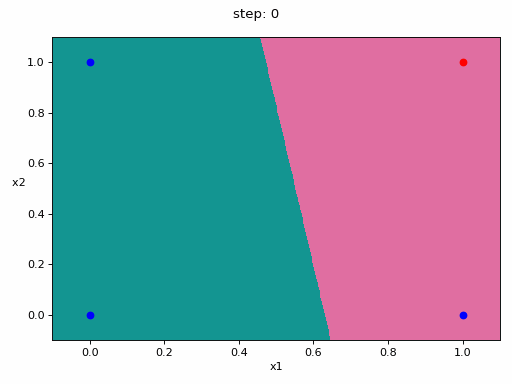

In [13]:
from matplotlib.animation import FuncAnimation
from IPython.display import display, Image

# Creamos la gráfica inicial
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)
ax.set_xlabel('x1')
ax.set_ylabel('x2  ', rotation=0)

# Se dibujan los datos que persistiran en toda la evolución de la gráfica
ax.scatter(x1[0:3], x2[0:3], c='blue')
ax.scatter(x1[3], x2[3], c='red')

# Se dibuja el el fondo que irán cambiando durante el entrenamiento
max_axis = 1.1
min_axis = -0.1
axes = [min_axis, max_axis, min_axis, max_axis]
xx1, xx2 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 500).reshape(-1, 1),
)
X1_new = np.c_[xx1.ravel()]
X2_new = np.c_[xx2.ravel()]
all_z_predict = w0 + w1*X1_new + w2*X2_new
all_z_predict = (all_z_predict>0.5).astype(int)
all_z_predict = all_z_predict.reshape(xx1.shape)
colormap = ListedColormap(['#149691', '#e16fa2'])
fondo = ax.contourf(xx1, xx2, all_z_predict, cmap=colormap)

# Se dibuja un título
fontsize = 12
titulo = fig.suptitle(f'step: {0}', fontsize=fontsize)

# Se define la función que va a modificar la gráfica con la evolución del entrenamiento
def update(i):
    # Se actualiza el fondo
    all_z_predict = Ws0[i] + Ws1[i]*X1_new + Ws2[i]*X2_new
    all_z_predict = (all_z_predict>0.5) + 0
    all_z_predict = all_z_predict.reshape(xx1.shape)
    ax.contourf(xx1, xx2, all_z_predict, cmap=colormap)
    ax.scatter(x1[0:3], x2[0:3], c='blue')
    ax.scatter(x1[3], x2[3], c='red')

    # Se actualiza el título
    titulo.set_text(f'step: {i}')

    return 0

# Se crea la animación con un refresco cada 200 ms
interval = 200 # ms
anim = FuncAnimation(fig, update, frames=np.arange(0, steps), interval=interval)

# Se guarda en un GIF
gif_name = "GIFs/entrenamiento_AND.gif"
anim.save(gif_name, dpi=80, writer='pillow')

# Leer el GIF y mostrarlo
with open(gif_name, 'rb') as f:
    display(Image(data=f.read()))

# Se elimina la figura para que no se muestre en el notebook
plt.close()

Como se puede ver ahora se asemeja mucho mejor a los puntos